<a href="https://colab.research.google.com/github/Vamsi-Teja-Chevula/ML/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression

## Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Importing Data Set

In [16]:
data_set = pd.read_csv("Covid_data Multiple Linear Regr.csv")
X = data_set.iloc[:,:-1].values
y = data_set.iloc[:,-1].values

In [17]:
print(X)

[[10 'Moderate' 0 97]
 [80 'High' 0 92]
 [10 'Low' 0 97]
 [81 'High' 4 75]
 [12 'Moderate' 0 97]
 [18 'Low' 0 66]
 [13 'Moderate' 0 93]
 [94 'High' 4 64]
 [86 'High' 2 76]
 [20 'Moderate' 0 92]
 [15 'Moderate' 0 94]
 [15 'Moderate' 0 92]
 [16 'Low' 0 92]
 [17 'Moderate' 0 93]
 [18 'Moderate' 0 93]
 [19 'Moderate' 0 92]
 [19 'Moderate' 0 89]
 [12 'Moderate' 0 97]
 [20 'Moderate' 0 93]
 [24 'Moderate' 0 92]
 [25 'Moderate' 0 93]
 [59 'High' 2 68]
 [63 'High' 1 66]
 [25 'Moderate' 1 62]
 [26 'High' 0 94]
 [26 'Low' 0 97]
 [28 'Moderate' 0 99]
 [59 'High' 0 69]
 [28 'Moderate' 0 89]
 [29 'Moderate' 0 93]
 [48 'Moderate' 0 93]
 [30 'Moderate' 0 62]
 [30 'Moderate' 0 86]
 [32 'Moderate' 0 84]
 [34 'Moderate' 1 90]
 [35 'Moderate' 0 89]
 [50 'High' 2 77]
 [56 'High' 2 76]
 [56 'High' 1 77]
 [36 'High' 1 90]
 [38 'High' 2 75]
 [40 'Moderate' 0 90]
 [40 'High' 0 92]
 [61 'High' 2 76]
 [42 'High' 0 92]
 [46 'High' 0 91]
 [49 'Moderate' 0 80]
 [52 'High' 1 80]
 [32 'Moderate' 0 89]
 [53 'High' 1 

## Encoding categorical data

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [19]:
print(X)

[[0.0 0.0 1.0 10 0 97]
 [1.0 0.0 0.0 80 0 92]
 [0.0 1.0 0.0 10 0 97]
 [1.0 0.0 0.0 81 4 75]
 [0.0 0.0 1.0 12 0 97]
 [0.0 1.0 0.0 18 0 66]
 [0.0 0.0 1.0 13 0 93]
 [1.0 0.0 0.0 94 4 64]
 [1.0 0.0 0.0 86 2 76]
 [0.0 0.0 1.0 20 0 92]
 [0.0 0.0 1.0 15 0 94]
 [0.0 0.0 1.0 15 0 92]
 [0.0 1.0 0.0 16 0 92]
 [0.0 0.0 1.0 17 0 93]
 [0.0 0.0 1.0 18 0 93]
 [0.0 0.0 1.0 19 0 92]
 [0.0 0.0 1.0 19 0 89]
 [0.0 0.0 1.0 12 0 97]
 [0.0 0.0 1.0 20 0 93]
 [0.0 0.0 1.0 24 0 92]
 [0.0 0.0 1.0 25 0 93]
 [1.0 0.0 0.0 59 2 68]
 [1.0 0.0 0.0 63 1 66]
 [0.0 0.0 1.0 25 1 62]
 [1.0 0.0 0.0 26 0 94]
 [0.0 1.0 0.0 26 0 97]
 [0.0 0.0 1.0 28 0 99]
 [1.0 0.0 0.0 59 0 69]
 [0.0 0.0 1.0 28 0 89]
 [0.0 0.0 1.0 29 0 93]
 [0.0 0.0 1.0 48 0 93]
 [0.0 0.0 1.0 30 0 62]
 [0.0 0.0 1.0 30 0 86]
 [0.0 0.0 1.0 32 0 84]
 [0.0 0.0 1.0 34 1 90]
 [0.0 0.0 1.0 35 0 89]
 [1.0 0.0 0.0 50 2 77]
 [1.0 0.0 0.0 56 2 76]
 [1.0 0.0 0.0 56 1 77]
 [1.0 0.0 0.0 36 1 90]
 [1.0 0.0 0.0 38 2 75]
 [0.0 0.0 1.0 40 0 90]
 [1.0 0.0 0.0 40 0 92]
 [1.0 0.0 0

## Splitting into test and training set

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

## Training the Multiple Linear Regression model on the Training set

In [34]:
from sklearn.linear_model import LinearRegression
regressor =LinearRegression()
regressor.fit(X_train,y_train) #magic is happening here

LinearRegression()

## Predicting the Test set results

In [35]:
y_pred= regressor.predict(X_test)
np.set_printoptions(precision=3)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)) ,1))


[[ 60698.489  59994.   ]
 [106610.635 127181.   ]
 [ 63304.777  50104.   ]
 [105389.042 110911.   ]
 [ 63167.546  62019.   ]
 [ 99229.335  97101.   ]
 [102601.651 101000.   ]
 [ 89034.772  90015.   ]
 [ 82347.886  84008.   ]
 [105089.422 100000.   ]
 [ 83253.015  75012.   ]
 [ 98911.001  98101.   ]
 [103823.243 112101.   ]
 [ 95591.144  99110.   ]
 [ 63790.34   67019.   ]
 [ 82127.038  83891.   ]
 [ 58956.779  56095.   ]
 [ 88794.054  90124.   ]
 [ 41626.827  41891.   ]
 [ 71873.925  73010.   ]
 [ 98566.795  98081.   ]]


## Visualizing results

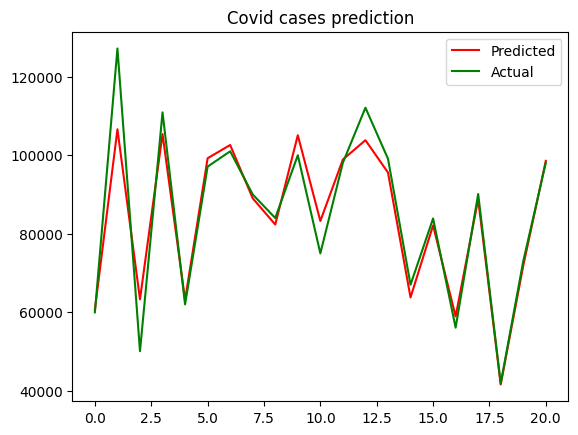

In [46]:
plt.plot(y_pred, color='red', label='Predicted')
plt.plot(y_test, color='green', label='Actual')
plt.legend()
plt.title("Covid cases prediction")
plt.show()